In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Air Quality Index (AQI)  

##Importing The dataset

In [ ]:
%pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/azminetoushikwasi/aqi-air-quality-index-scheduled-daily-update')

Skipping, found downloaded files in "./aqi-air-quality-index-scheduled-daily-update" (use force=True to force download)


In [ ]:
filepath = './aqi-air-quality-index-scheduled-daily-update/data_date.csv'
aqi_df = pd.read_csv(filepath)

In [ ]:
aqi_df

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
11095,2023-05-11,Uzbekistan,Moderate,57
11096,2023-05-11,Vatican,Good,50
11097,2023-05-11,Venezuela,Good,17
11098,2023-05-11,Vietnam,Moderate,94


##Data Preparation And Visualisation

In [ ]:
aqi_df

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
11095,2023-05-11,Uzbekistan,Moderate,57
11096,2023-05-11,Vatican,Good,50
11097,2023-05-11,Venezuela,Good,17
11098,2023-05-11,Vietnam,Moderate,94


In [ ]:
aqi_df.rename(columns={'AQI Value':'AQI_value'},inplace=True)

In [ ]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       11100 non-null  object
 1   Country    11100 non-null  object
 2   Status     11100 non-null  object
 3   AQI_value  11100 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 347.0+ KB


In [ ]:
aqi_df.nunique()

Date          72
Country      142
Status         6
AQI_value    279
dtype: int64

In [ ]:
aqi_df.isna().sum()

Date         0
Country      0
Status       0
AQI_value    0
dtype: int64

In [ ]:
aqi_df.Status.unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [ ]:
average_aqi_value = aqi_df.AQI_value.sum()
average_aqi_value/=len(aqi_df)
average_aqi_value

61.88306306306306

In [ ]:
aqi_df["Country"]= aqi_df["Country"].replace({'United Kingdom of Great Britain and Northern Ireland':"Great Britain"})

##Exploratory Analysis and Visualization

###Mean AQI

In [ ]:
country_average_aqi=aqi_df.groupby('Country')['AQI_value'].mean()
country_average_aqi

Country
Albania        26.518987
Algeria        63.602564
Andorra        31.772152
Angola        106.405063
Argentina      36.974684
                 ...    
Uzbekistan     67.223684
Vatican        44.582278
Venezuela      14.986842
Vietnam        91.658228
Zambia        121.397436
Name: AQI_value, Length: 142, dtype: float64

<Axes: xlabel='AQI_value', ylabel='Country'>

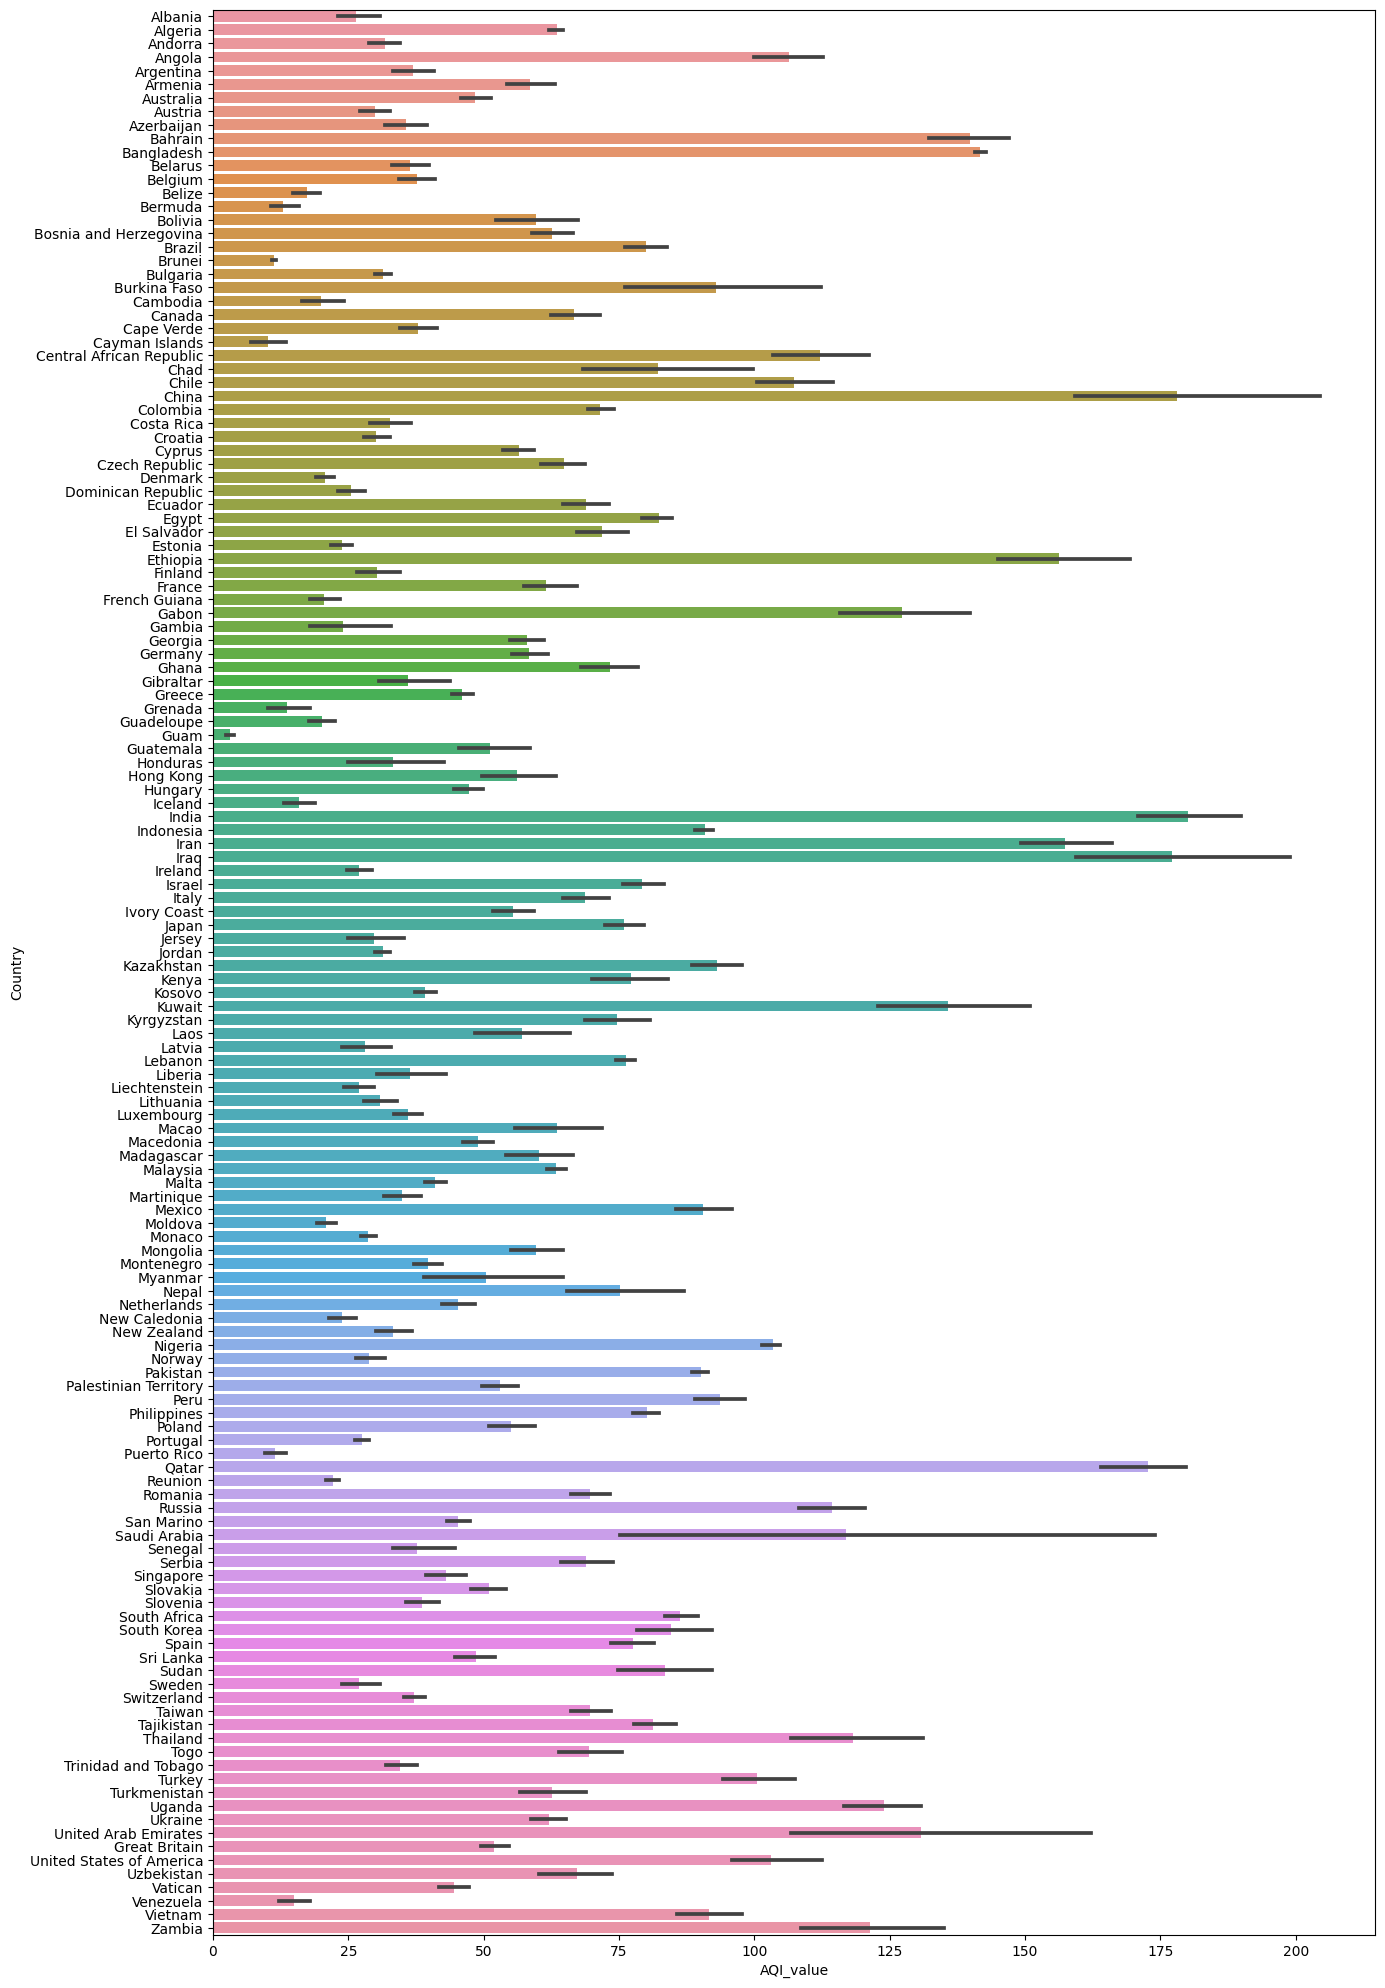

In [ ]:
plt.figure(figsize=(15,25))
sns.barplot(x='AQI_value',y='Country',data=aqi_df)

In [ ]:
aqi_df.Date = pd.to_datetime(aqi_df.Date)
aqi_df.Date

0       2022-07-21
1       2022-07-21
2       2022-07-21
3       2022-07-21
4       2022-07-21
           ...    
11095   2023-05-11
11096   2023-05-11
11097   2023-05-11
11098   2023-05-11
11099   2023-05-11
Name: Date, Length: 11100, dtype: datetime64[ns]

###Latest AQI
As of now the latest data is recorded upto 11.05.23

In [ ]:
latest_aqi = aqi_df[aqi_df.Date == pd.to_datetime('2023-05-11')]
latest_aqi

,Date,Country,Status,AQI_value
10962,2023-05-11,Albania,Good,11
10963,2023-05-11,Algeria,Good,34
10964,2023-05-11,Andorra,Good,13
10965,2023-05-11,Angola,Unhealthy for Sensitive Groups,117
10966,2023-05-11,Argentina,Good,14
...,...,...,...,...
11095,2023-05-11,Uzbekistan,Moderate,57
11096,2023-05-11,Vatican,Good,50
11097,2023-05-11,Venezuela,Good,17
11098,2023-05-11,Vietnam,Moderate,94


<Axes: xlabel='AQI_value', ylabel='Country'>

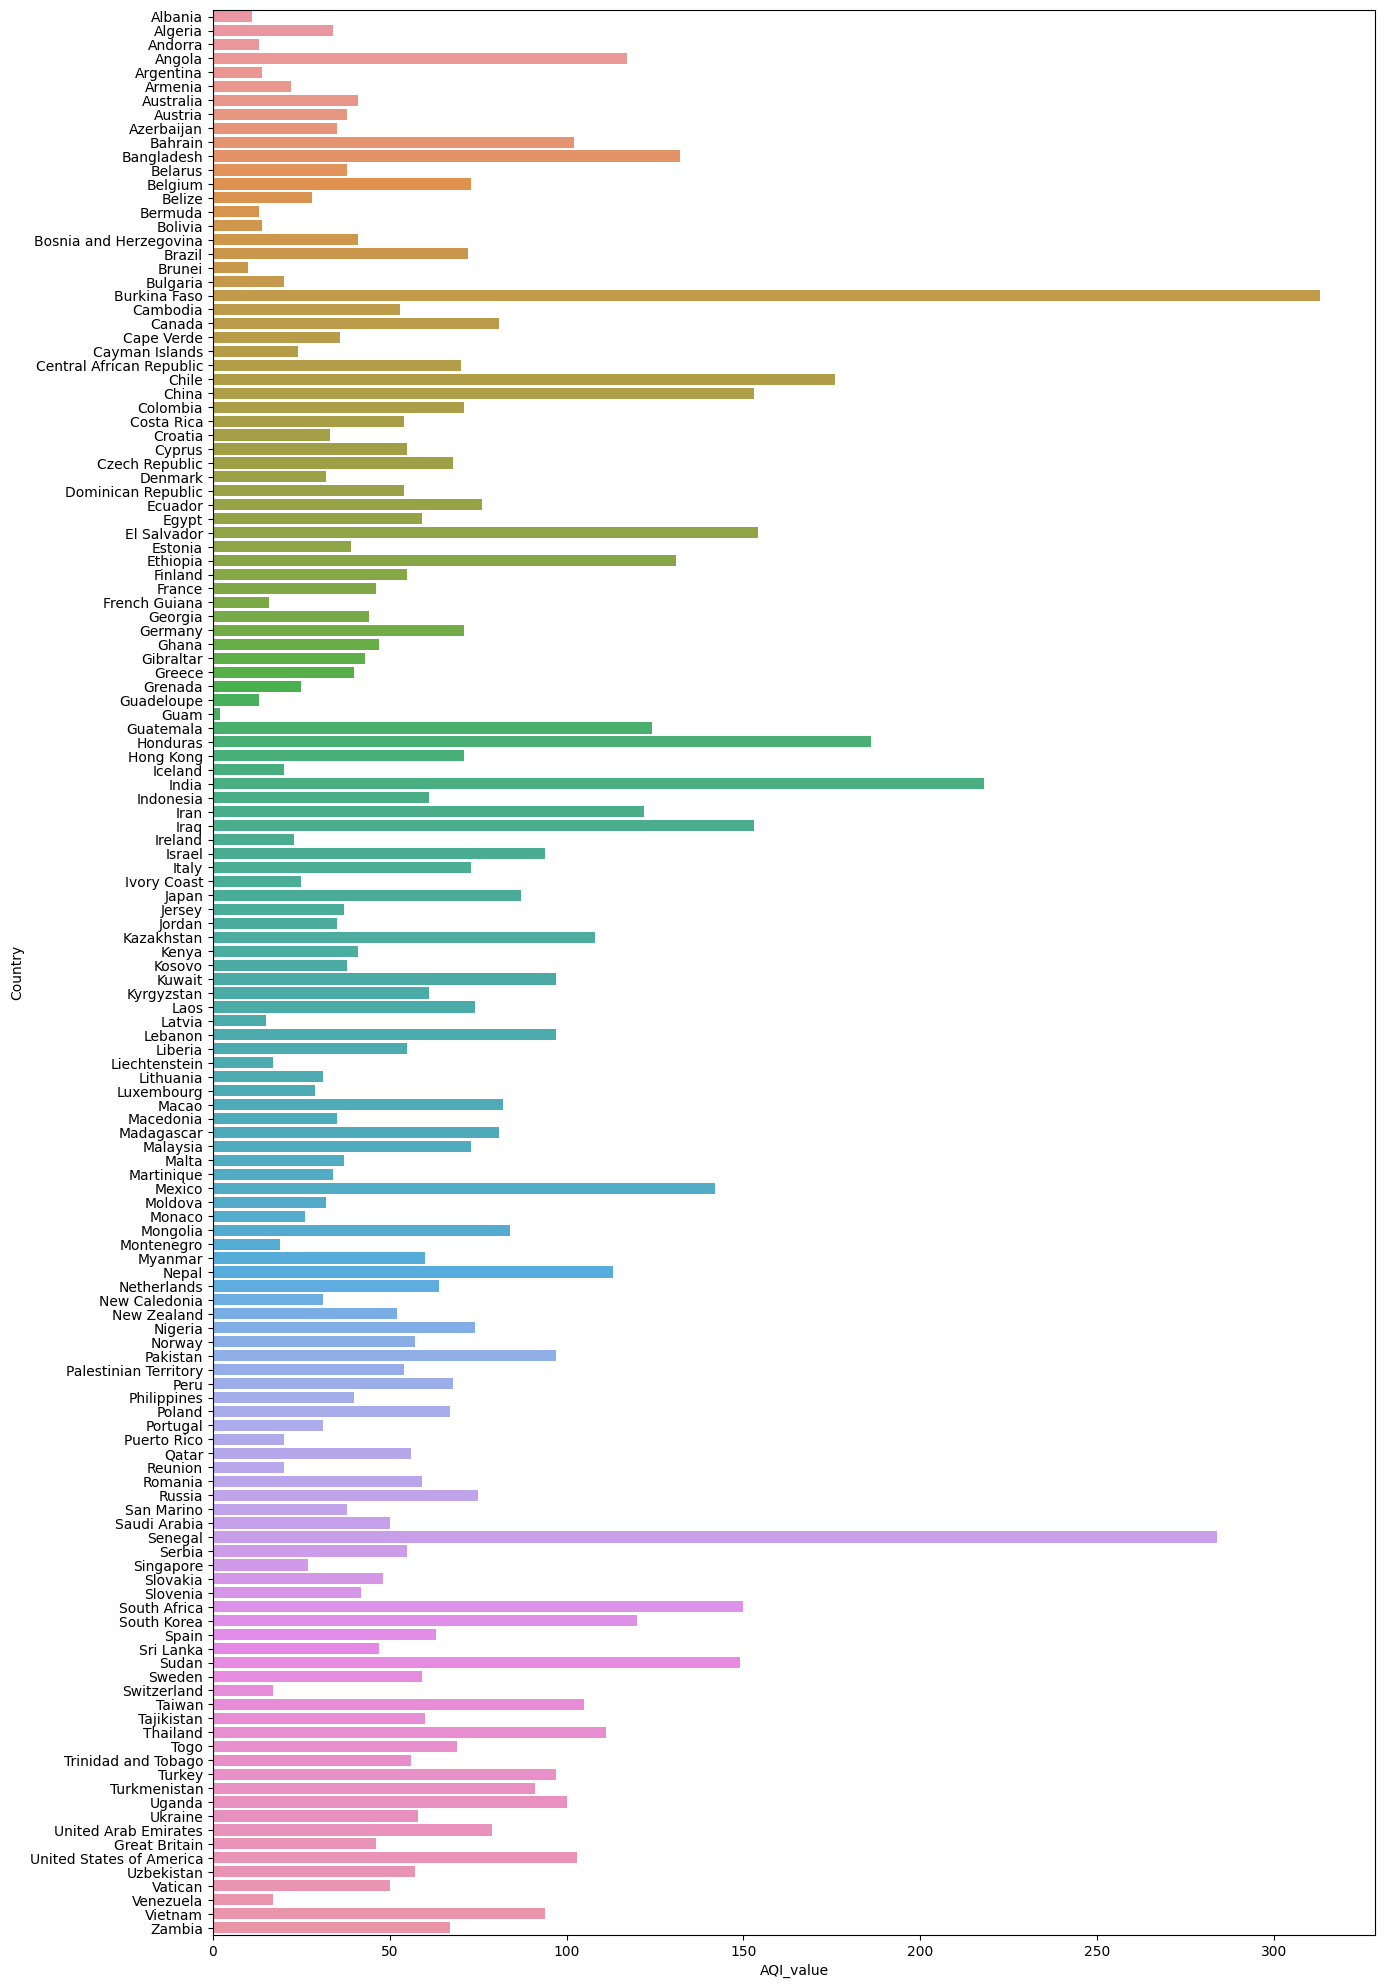

In [ ]:
plt.figure(figsize=(15,25))
sns.barplot(x='AQI_value',y='Country',data=latest_aqi)

In [ ]:
sorted_countries = latest_aqi.sort_values(by='AQI_value',ascending=False,ignore_index=True)
sorted_countries

,Date,Country,Status,AQI_value
0,2023-05-11,Burkina Faso,Hazardous,313
1,2023-05-11,Senegal,Very Unhealthy,284
2,2023-05-11,India,Very Unhealthy,218
3,2023-05-11,Honduras,Unhealthy,186
4,2023-05-11,Chile,Unhealthy,176
...,...,...,...,...
133,2023-05-11,Andorra,Good,13
134,2023-05-11,Bermuda,Good,13
135,2023-05-11,Albania,Good,11
136,2023-05-11,Brunei,Good,10


<Axes: xlabel='Country', ylabel='AQI_value'>

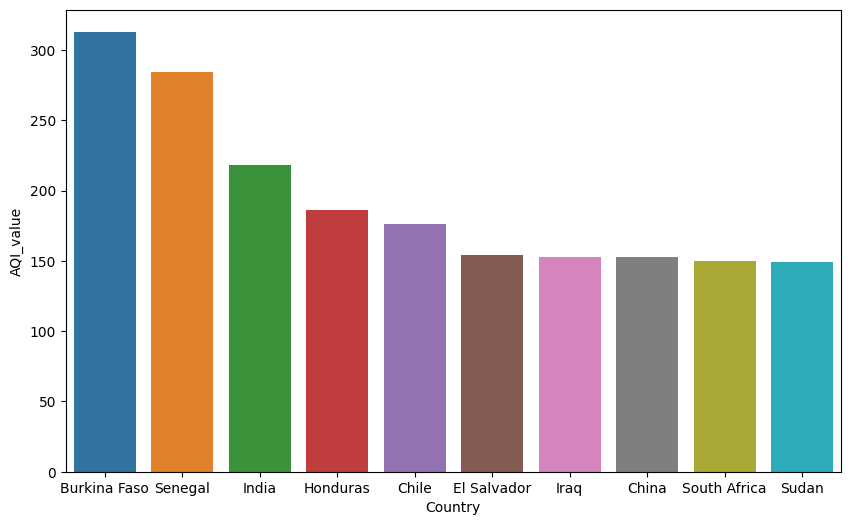

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Country',y='AQI_value',data=sorted_countries[:10])

##Questions and Answers

What are the top 10 countries having highest AQI value?

In [ ]:
sorted_countries[['Country','AQI_value','Status']][:10]

,Country,AQI_value,Status
0,Burkina Faso,313,Hazardous
1,Senegal,284,Very Unhealthy
2,India,218,Very Unhealthy
3,Honduras,186,Unhealthy
4,Chile,176,Unhealthy
5,El Salvador,154,Unhealthy
6,Iraq,153,Unhealthy
7,China,153,Unhealthy
8,South Africa,150,Unhealthy for Sensitive Groups
9,Sudan,149,Unhealthy for Sensitive Groups


What are the top 10 countries which are safest to live?

In [ ]:
sorted_countries[['Country','AQI_value','Status']][-1:-11:-1]

,Country,AQI_value,Status
137,Guam,2,Good
136,Brunei,10,Good
135,Albania,11,Good
134,Bermuda,13,Good
133,Andorra,13,Good
132,Guadeloupe,13,Good
131,Argentina,14,Good
130,Bolivia,14,Good
129,Latvia,15,Good
128,French Guiana,16,Good


##India's AQI Analysis

In [ ]:
india_aqi = aqi_df[aqi_df['Country']=='India']
india_aqi

,Date,Country,Status,AQI_value
59,2022-07-21,India,Unhealthy,162
201,2022-07-21,India,Unhealthy,162
343,2022-07-22,India,Very Unhealthy,226
484,2022-07-22,India,Unhealthy,160
625,2022-07-22,India,Unhealthy,153
...,...,...,...,...
10464,2023-04-13,India,Very Unhealthy,231
10604,2023-04-20,India,Very Unhealthy,235
10742,2023-04-27,India,Very Unhealthy,256
10880,2023-05-04,India,Unhealthy,181


In [ ]:
india_aqi.nunique()

Date         72
Country       1
Status        4
AQI_value    52
dtype: int64

In [ ]:
india_grouped=india_aqi.groupby('Date')['AQI_value'].mean()
india_grouped

Date
2022-07-21    162.000000
2022-07-22    179.666667
2022-07-23    143.500000
2022-07-24    147.000000
2022-07-25    146.000000
                 ...    
2023-04-13    231.000000
2023-04-20    235.000000
2023-04-27    256.000000
2023-05-04    181.000000
2023-05-11    218.000000
Name: AQI_value, Length: 72, dtype: float64

Text(0.5, 1.0, 'Trend of AQI')

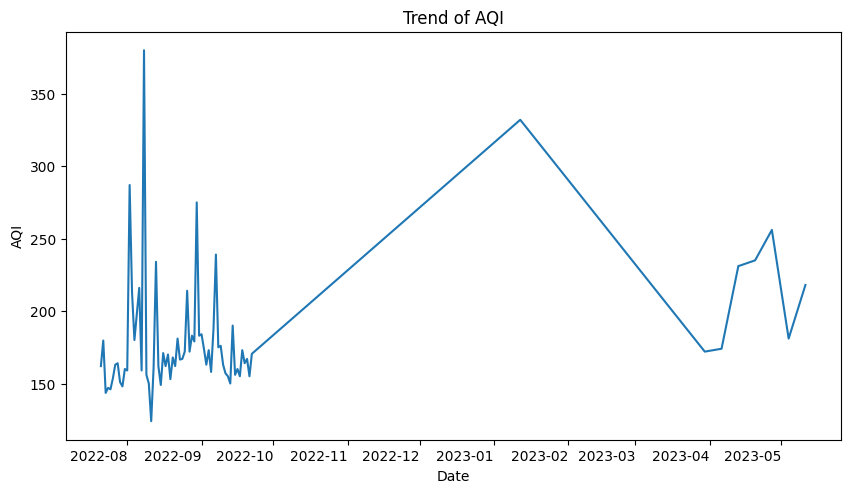

In [ ]:
plt.figure(figsize=(10, 6))
india_grouped.plot(kind='line',rot=0)
plt.ylabel('AQI')
plt.title('Trend of AQI')

In [ ]:
india_aqi['Month']=india_aqi.Date.dt.month
india_aqi

<ipython-input-56-df0f4561989f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_aqi['Month']=india_aqi.Date.dt.month


,Date,Country,Status,AQI_value,Month
59,2022-07-21,India,Unhealthy,162,7
201,2022-07-21,India,Unhealthy,162,7
343,2022-07-22,India,Very Unhealthy,226,7
484,2022-07-22,India,Unhealthy,160,7
625,2022-07-22,India,Unhealthy,153,7
...,...,...,...,...,...
10464,2023-04-13,India,Very Unhealthy,231,4
10604,2023-04-20,India,Very Unhealthy,235,4
10742,2023-04-27,India,Very Unhealthy,256,4
10880,2023-05-04,India,Unhealthy,181,5


In [ ]:
india_month_wise = india_aqi.groupby('Month')['AQI_value'].mean()
india_month_wise

Month
1    332.00000
3    172.00000
4    224.00000
5    199.50000
7    158.50000
8    186.65625
9    170.26087
Name: AQI_value, dtype: float64

Text(0.5, 1.0, 'Average AQI by Month')

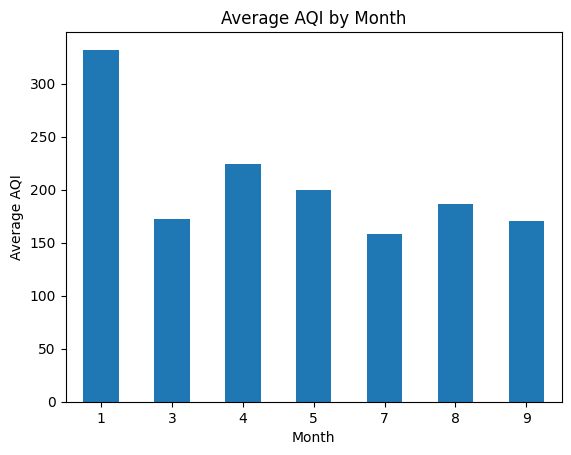

In [ ]:
india_month_wise.plot(kind='bar',rot=0)
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.title('Average AQI by Month')

##Summary and Conclusion
- No columns with null value.
- Aqi index of 142 countries is there.
- Average AQI value of the world is 61.883.
- According to latest aqi data (upto 11.05.2023), the country with most hazardous is Burkina Faso
- India's AQI is mostly unhealthy
